### [1] 第一部分：TensorFlow 基础 <br/>
   &emsp; 1.1 TensorFlow 模块  <br/>
   &emsp; 1.2 自动求导机制  <br/>
   &emsp; 1.3 基础示例：线性回归  <br/>


### 小记
（1）变量与张量的区别？<br/>
变量与普通张量的一个重要区别是其默认能够被 TensorFlow 的自动求导机制所求导，因此往往被用于定义机器学习模型的参数。<br/>
x = tf.Variable(initial_value=3.)  #  变量 <br/>
x = tf.constant([[1.], [2.]])  # 张量

## 1.1 TensorFlow 基础模块

In [1]:
import tensorflow as tf

TensorFlow 使用 张量 （Tensor）作为数据的基本单位。TensorFlow 的张量在概念上等同于多维数组，我们可以使用它来描述数学中的标量（0 维数组）、向量（1 维数组）、矩阵（2 维数组）等各种量，示例如下：

In [2]:
# 定义一个随机数（标量）
random_float = tf.random.uniform(shape=())

# 定义一个有2个元素的零向量
zero_vector = tf.zeros(shape=(2))

# 定义两个2×2的常量矩阵
A = tf.constant([[1., 2.], [3., 4.]])
B = tf.constant([[5., 6.], [7., 8.]])

In [3]:
A, B

(<tf.Tensor: id=10, shape=(2, 2), dtype=float32, numpy=
 array([[1., 2.],
        [3., 4.]], dtype=float32)>,
 <tf.Tensor: id=11, shape=(2, 2), dtype=float32, numpy=
 array([[5., 6.],
        [7., 8.]], dtype=float32)>)

In [4]:
# 查看矩阵A的形状、类型和值
print(A.shape)      # 输出(2, 2)，即矩阵的长和宽均为2
print(A.dtype)      # 输出<dtype: 'float32'>
print(A.numpy())    # 输出[[1. 2.]
                    #      [3. 4.]]

(2, 2)
<dtype: 'float32'>
[[1. 2.]
 [3. 4.]]


## 1.2 自动求导机制

**（1）计算函数的导数。<br/>**
TensorFlow 提供了强大的 自动求导机制 来计算导数。在即时执行模式下，TensorFlow 引入了 tf.GradientTape() 这个 “求导记录器” 来实现自动求导。以下代码展示了如何使用 tf.GradientTape() 计算函数 y(x) = x^2 在 x = 3 时的导数：

In [5]:
x = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:     # 在 tf.GradientTape() 的上下文内，所有计算步骤都会被记录以用于求导
    y = tf.square(x)
y_grad = tape.gradient(y, x)        # 计算y关于x的导数
print(y, y_grad)

tf.Tensor(9.0, shape=(), dtype=float32) tf.Tensor(6.0, shape=(), dtype=float32)


**（2）求偏导数：<br/>**
在机器学习中，更加常见的是对多元函数求偏导数，以及对向量或矩阵的求导。这些对于 TensorFlow 也不在话下。以下代码展示了如何使用 tf.GradientTape() 计算函数 L(w, b) = \|Xw + b - y\|^2 在 w = (1, 2)^T, b = 1 时分别对 w, b 的偏导数。其中 X = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix},  y = \begin{bmatrix} 1 \\ 2\end{bmatrix}。

In [6]:
# 求偏导
X = tf.constant([[1., 2.], [3., 4.]])  # 定义张量
y = tf.constant([[1.], [2.]])
w = tf.Variable(initial_value=[[1.], [2.]])
b = tf.Variable(initial_value=1.)
with tf.GradientTape() as tape:
    L = tf.reduce_sum(tf.square(tf.matmul(X, w) + b - y))
w_grad, b_grad = tape.gradient(L, [w, b])        # 计算L(w, b)关于w, b的偏导数
print(L, w_grad, b_grad)

tf.Tensor(125.0, shape=(), dtype=float32) tf.Tensor(
[[ 70.]
 [100.]], shape=(2, 1), dtype=float32) tf.Tensor(30.0, shape=(), dtype=float32)


## 1.3 基础示例：线性回归

考虑一个实际问题，某城市在 2013 年 - 2017 年的房价如下表所示：<br/>
年份 2013  2014  2015  2016  2017 <br/>
房价 12000 14000 15000 16500 17500  <br/>
现在，我们希望通过对该数据进行线性回归，即使用线性模型 y = ax + b 来拟合上述数据，此处 a 和 b 是待求的参数。

### (1) NumPy 下的线性回归 

In [7]:

import numpy as np

X_raw = np.array([2013, 2014, 2015, 2016, 2017], dtype=np.float32)
y_raw = np.array([12000, 14000, 15000, 16500, 17500], dtype=np.float32)

X = (X_raw - X_raw.min()) / (X_raw.max() - X_raw.min())
y = (y_raw - y_raw.min()) / (y_raw.max() - y_raw.min())

In [8]:
X, y

(array([0.  , 0.25, 0.5 , 0.75, 1.  ], dtype=float32),
 array([0.        , 0.36363637, 0.54545456, 0.8181818 , 1.        ],
       dtype=float32))

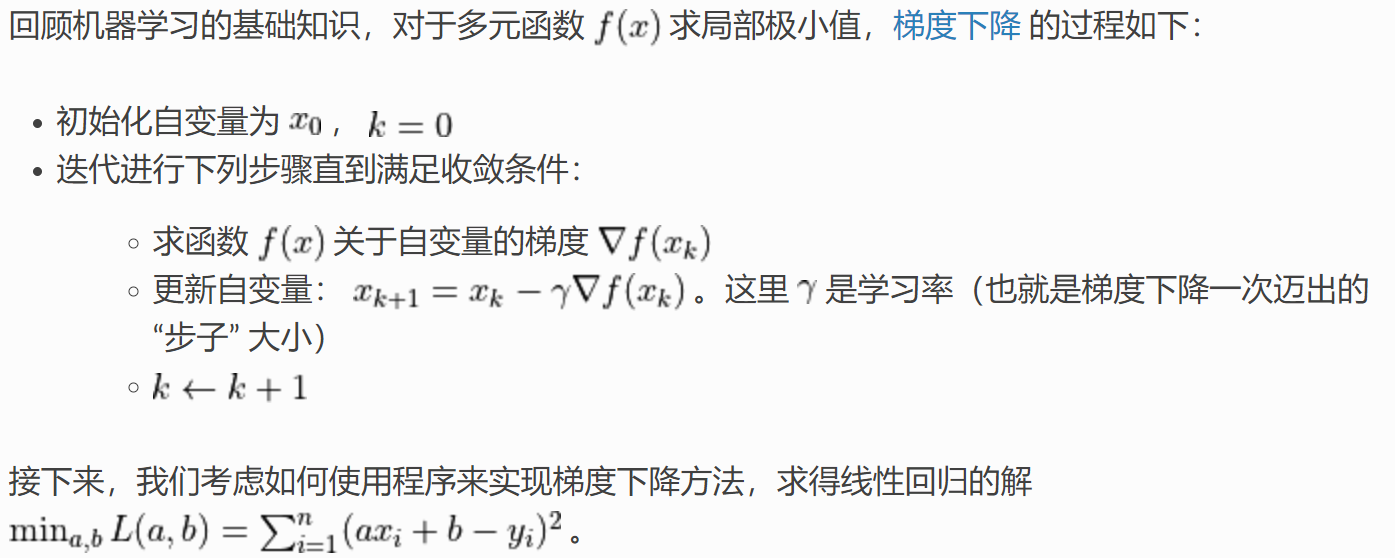

In [9]:
a, b = 0, 0

num_epoch = 10000
learning_rate = 5e-4
for e in range(num_epoch):
    # 手动计算损失函数关于自变量（模型参数）的梯度
    y_pred = a * X + b
    grad_a = 2 * (y_pred - y).dot(X)  # 对a进行求偏导，执行dot(x)后会有累加
    grad_b = 2 * (y_pred - y).sum()   # 对b进行求偏导

    # 更新参数
    a, b = a - learning_rate * grad_a, b - learning_rate * grad_b

print(a, b)

0.9763702027946725 0.05756498830020202


### （2）TensorFlow 下的线性回归

使用 **tape.gradient(ys, xs)** 自动计算梯度；<br/>
使用 **optimizer.apply_gradients(grads_and_vars)** 自动更新模型参数。

In [10]:
X = tf.constant(X)
y = tf.constant(y)

a = tf.Variable(initial_value=0.)
b = tf.Variable(initial_value=0.)
variables = [a, b] 

num_epoch = 10000
optimizer = tf.keras.optimizers.SGD(learning_rate=5e-4)  # 相当于 x = x - 0.00005 * grad_x
for e in range(num_epoch):
    # 使用tf.GradientTape()记录损失函数的梯度信息
    with tf.GradientTape() as tape:
        y_pred = a * X + b
        loss = tf.reduce_sum(tf.square(y_pred - y))
    # TensorFlow自动计算损失函数关于自变量（模型参数）的梯度
    grads = tape.gradient(loss, variables)
    # TensorFlow自动根据梯度更新参数
    optimizer.apply_gradients(grads_and_vars=zip(grads, variables))   # [(grad_a, a), (grad_b, b)]
a, b

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.97637>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.057565063>)

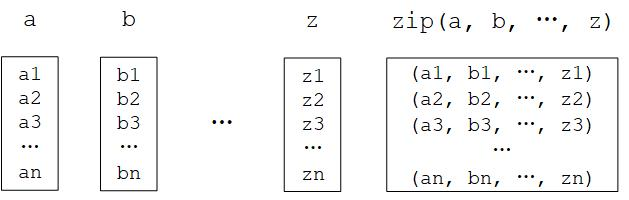